# AoF Replication 3

Due date: <b>March 06, 2023 Monday 2pm </b>.

This content is authored by Maria Boutchkova for use in the University of Edinbugh Business School Applications of Econometrics course in Spring 2023.

This notebook covers:

* Shock propagation graph
* Parallel trend graphs
* Populating matrices
* Diff-in-diff tables and regressions

The first computational cell below (with In [ ] in front) contains the solution. Go over the command lines, make sure they make sense to you, click inside the cell, it should become surrounded by a green rectangle, press Esc - the rectangle will become blue, now press Shift+Enter - this will execute the cell and produce the results beneath it.
While a cell is being executed it shows an asterisk in front of "In [ ]".

To remove all output in the notebook and start again, go to the Kernel tab above, select Restart and Clear Output.

You can add command cells for auxiliary commands and/or steps by choosing Insert Cell above or Cell below from the top Menu.

Your work is marked based on the input data provided with the notebook and the results may differ slightly from the ones reported in the paper.

### Task 1: Shock propagation graph

Task 1.1 Import in Stata the csv file autor provided with this assignment. (It does not contain variable labels but you can see them in the original .dta file autor-jole-2003 that is part of the zip file replic_03)

In [1]:
*** BEGIN SOLUTION
import delimited autor.csv, varn(1) clear
*** END SOLUTION


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 14 Sep 2023
Serial number: 401709309008
  Licensed to: College of Arts, Humanities and Social Sciences
               University of Edinburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.

. *** BEGIN SOLUTION
. import delimited autor.csv, varn(1) clear
(encoding automatically selected: ISO-8859-1)
(598 vars, 1,200 obs)

. *** END SOLUTION
. 


In [2]:
%browse

,state,year,ue,cpsths,tempue,hrwage,wkwage,lnhrw,lnwkw,lnftw,hsd,hsg,smc,clg,gtc,rs_wm,rs_wf,rs_bm,rs_bf,rs_om,rs_of,m1619,m2024,m2554,m5564,m65up,f1619,f2024,f2554,f5564,f65up,inagri,inmine,intran,inmand,inmann,incons,inwtrd,inrtrd,infire,insvcs,ingovt,inmiss,unmem,uncov,se,smsa,marfem,marmale,nobs,nwork,mdhrw,mdwkw,mdlnhw,mdlnww,mdlnftw,abbrev,minwg,cpi_ann,pce,covemp,aww,awben,rrate,iur,maxben,max,maxm2,maxnk,cepnp,tcovemp,stateemp,stateths,usemp,stfrac,usfrac,drp,thsemp,peremp,svcemp,advemp,crdemp,malemp,bldemp,cmpemp,mscemp,eqpemp,lnths,lnper,lnsvc,lnadv,lncrd,lnmal,lnbld,lncmp,lnmsc,lneqp,count,rppn,rppb,rico,rgfc,rgft,rtor,rcon,mppn,mppb,mico,mgfc,mgft,mtor,mcon,rmdiffer,prfdkico,userand,pico,pcon,rbrd,rcgf,mbrd,mcgf,pcgf,rppa,rgfa,mppa,mgfa,adrppn0,adrppb0,adrico0,adrgfc0,adrgft0,adrtor0,adrcon0,adrbrd0,adrcgf0,adrppa0,adrgfa0,admppn0,admppb0,admico0,admgfc0,admgft0,admtor0,admcon0,admbrd0,admcgf0,admppa0,admgfa0,adpico0,adpcon0,adpcgf0,adrppn_1,adrppb_1,adrico_1,adrgfc_1,adrgft_1,adrtor_1,adrcon_1,adrbrd_1,adrcgf_1,adrppa_1,adrgfa_1,admppn_1,admppb_1,admico_1,admgfc_1,admgft_1,admtor_1,admcon_1,admbrd_1,admcgf_1,admppa_1,admgfa_1,adpico_1,adpcon_1,adpcgf_1,adrppn_2,adrppb_2,adrico_2,adrgfc_2,adrgft_2,adrtor_2,adrcon_2,adrbrd_2,adrcgf_2,adrppa_2,adrgfa_2,admppn_2,admppb_2,admico_2,admgfc_2,admgft_2,admtor_2,admcon_2,admbrd_2,admcgf_2,admppa_2,admgfa_2,adpico_2,adpcon_2,adpcgf_2,adrppnld,adrppbld,adricold,adrgfcld,adrgftld,adrtorld,adrconld,adrbrdld,adrcgfld,adrppald,adrgfald,admppnld,admppbld,admicold,admgfcld,admgftld,admtorld,admconld,admbrdld,admcgfld,admppald,admgfald,adpicold,adpconld,adpcgfld,adrppn1,adrppb1,adrico1,adrgfc1,adrgft1,adrtor1,adrcon1,adrbrd1,adrcgf1,adrppa1,adrgfa1,admppn1,admppb1,admico1,admgfc1,admgft1,admtor1,admcon1,admbrd1,admcgf1,admppa1,admgfa1,adpico1,adpcon1,adpcgf1,adrppn2,adrppb2,adrico2,adrgfc2,adrgft2,adrtor2,adrcon2,adrbrd2,adrcgf2,adrppa2,adrgfa2,admppn2,admppb2,admico2,admgfc2,admgft2,admtor2,admcon2,admbrd2,admcgf2,admppa2,admgfa2,adpico2,adpcon2,adpcgf2,adrppn3,adrppb3,adrico3,adrgfc3,adrgft3,adrtor3,adrcon3,adrbrd3,adrcgf3,adrppa3,adrgfa3,admppn3,admppb3,admico3,admgfc3,admgft3,admtor3,admcon3,admbrd3,admcgf3,admppa3,admgfa3,adpico3,adpcon3,adpcgf3,adrppn4,adrppb4,adrico4,adrgfc4,adrgft4,adrtor4,adrcon4,adrbrd4,adrcgf4,adrppa4,adrgfa4,admppn4,admppb4,admico4,admgfc4,admgft4,admtor4,admcon4,admbrd4,admcgf4,admppa4,admgfa4,adpico4,adpcon4,adpcgf4,adrppn5,adrppb5,adrico5,adrgfc5,adrgft5,adrtor5,adrcon5,adrbrd5,adrcgf5,adrppa5,adrgfa5,admppn5,admppb5,admico5,admgfc5,admgft5,admtor5,admcon5,admbrd5,admcgf5,admppa5,admgfa5,adpico5,adpcon5,adpcgf5,adrppn01,adrppb01,adrico01,adrgfc01,adrgft01,adrtor01,adrcon01,adrbrd01,adrcgf01,adrppa01,adrgfa01,admppn01,admppb01,admico01,admgfc01,admgft01,admtor01,admcon01,admbrd01,admcgf01,admppa01,admgfa01,adpico01,adpcon01,adpcgf01,adrppn23,adrppb23,adrico23,adrgfc23,adrgft23,adrtor23,adrcon23,adrbrd23,adrcgf23,adrppa23,adrgfa23,admppn23,admppb23,admico23,admgfc23,admgft23,admtor23,admcon23,admbrd23,admcgf23,admppa23,admgfa23,adpico23,adpcon23,adpcgf23,adrppn45,adrppb45,adrico45,adrgfc45,adrgft45,adrtor45,adrcon45,adrbrd45,adrcgf45,adrppa45,adrgfa45,admppn45,admppb45,admico45,admgfc45,admgft45,admtor45,admcon45,admbrd45,admcgf45,admppa45,admgfa45,adpico45,adpcon45,adpcgf45,rppn1,rppb1,rico1,rgfc1,rgft1,rtor1,rcon1,rbrd1,rcgf1,rppa1,rgfa1,mppn1,mppb1,mico1,mgfc1,mgft1,mtor1,mcon1,mbrd1,mcgf1,mppa1,mgfa1,pico1,pcon1,pcgf1,rppn2,rppb2,rico2,rgfc2,rgft2,rtor2,rcon2,rbrd2,rcgf2,rppa2,rgfa2,mppn2,mppb2,mico2,mgfc2,mgft2,mtor2,mcon2,mbrd2,mcgf2,mppa2,mgfa2,pico2,pcon2,pcgf2,rppn3,rppb3,rico3,rgfc3,rgft3,rtor3,rcon3,rbrd3,rcgf3,rppa3,rgfa3,mppn3,mppb3,mico3,mgfc3,mgft3,mtor3,mcon3,mbrd3,mcgf3,mppa3,mgfa3,pico3,pcon3,pcgf3,rppn4,rppb4,rico4,rgfc4,rgft4,rtor4,rcon4,rbrd4,rcgf4,rppa4,rgfa4,mppn4,mppb4,mico4,mgfc4,mgft4,mtor4,mcon4,mbrd4,mcgf4,mppa4,mgfa4,pico4,pcon4,pcgf4,rppn5,rppb5,rico5,rgfc5,rgft5,rtor5,rcon5,rbrd5,rcgf5,rppa5,rgfa5,mppn5,mppb5,mico5,mgfc5,m

In [3]:
*** BEGIN HIDDEN TESTS
python
from sfi import Data, Macro, Missing, SFIToolkit, Matrix
end
qui count
assert r(N) == 1200
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. python
----------------------------------------------- python (type end to exit) -----
>>> from sfi import Data, Macro, Missing, SFIToolkit, Matrix
>>> end
-------------------------------------------------------------------------------

. qui count

. assert r(N) == 1200

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


Task 1.2 Generate a new numeric variable state_num from the existing string variable abbrev.

In [4]:
*** BEGIN SOLUTION
encode abbrev if mico <., gen(state_num)
*** END SOLUTION


. *** BEGIN SOLUTION
. encode abbrev if mico <., gen(state_num)

. *** END SOLUTION
. 


In [5]:
*** BEGIN HIDDEN TESTS
confirm variable state_num
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. confirm variable state_num

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


Task 1.3 xtset the data

In [6]:
*** BEGIN SOLUTION
xtset state year
*** END SOLUTION


. *** BEGIN SOLUTION
. xtset state year

Panel variable: state (strongly balanced)
 Time variable: year, 74 to 97
         Delta: 1 unit

. *** END SOLUTION
. 


In [7]:
*** BEGIN HIDDEN TESTS
isid state year
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. isid state year

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


Task 1.4 Generate the variable new, which takes the value 1 only in the first year the Unjust Dismissal Doctrine becomes effective in a state and 0 otherwise

In [8]:
*** BEGIN SOLUTION
gen new = cond(mico == 1 & L.mico == 0,1,0)
*** END SOLUTION

In [9]:
*** BEGIN HIDDEN TESTS
qui count if new == 1
local test = `r(N)'
assert `test' == 39
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. qui count if new == 1

. local test = `r(N)'

. assert `test' == 39

. *** END HIDDEN TESTS
. 


Task 1.5 Produce the visualization of when the shock affects each state but this time have three separate categories with a corresponding legend in one row: 1 "Not Adopted” 2  "Newly Adopted and 3 "Adopted". Use the following colors: "Not Adopted” in a hollow circle; "Newly Adopted" in a solid black circle and "Adopted" in a solid grayscale6 using the option mcolor(gs6). Make sure the x-axis shows only the years 79 through 97. Adjust any options from the code producing the graph in cr_autor_viz to only show the 50 states that have non-missing data in Autor’s data.


. *** BEGIN SOLUTION
. twoway (scatter state_num year if mico == 0 & new < 1 & inrange(year,79,97), 
> msymbol(Oh) msize(small) mcolor(black)) (scatter state_num year if new == 1 &
>  inrange(year,79,97), msymbol(O) msize(small) mcolor(black)) (scatter state_n
> um year if mico == 1 & new < 1 & inrange(year,79,97), msymbol(O) msize(small)
>  mcolor(gs6)), graphregion(color(white)) xtitle("") ytitle("")  scheme(sj) yl
> abel(1(1)50, valuelabel labsize(vsmall) angle(horizontal)) xlabel(79(5)97) le
> gend(lab(1 "Not Adopted") lab(2 "Newly Adopted") lab(3 "Adopted") rows(1))

. *** END SOLUTION
. 


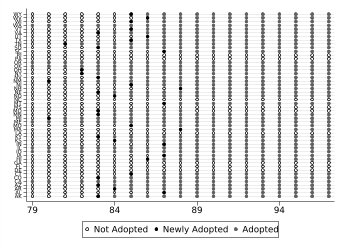

In [10]:
*** BEGIN SOLUTION
twoway (scatter state_num year if mico == 0 & new < 1 & inrange(year,79,97), msymbol(Oh) msize(small) mcolor(black)) (scatter state_num year if new == 1 & inrange(year,79,97), msymbol(O) msize(small) mcolor(black)) (scatter state_num year if mico == 1 & new < 1 & inrange(year,79,97), msymbol(O) msize(small) mcolor(gs6)), graphregion(color(white)) xtitle("") ytitle("")  scheme(sj) ylabel(1(1)50, valuelabel labsize(vsmall) angle(horizontal)) xlabel(79(5)97) legend(lab(1 "Not Adopted") lab(2 "Newly Adopted") lab(3 "Adopted") rows(1))
*** END SOLUTION

In [11]:
*** BEGIN HIDDEN TESTS
local test = fileexists("cr_autor_viz.gph")
assert `test' == 1
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS

Exception in thread Stata:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/usr/local/stata/utilities/pystata/core/stout.py", line 176, in run
    raise SystemError(output)
SystemError: 
. *** BEGIN HIDDEN TESTS
. local test = fileexists("cr_autor_viz.gph")

. assert `test' == 1
assertion is false
r(9);
r(9);



### Task 2: Parallel trend graphs

You may find the do file par_trends helpful - it is part of the zip file replic_03

Task 2.1 Generate the variable treated_83 to equal 1 for the states that adopt the Unjust Dismissal Doctrine in 83 and 0 for the states that have not adopted it until and including in 83. Make sure these values are filled in all years for these two categories of states.

In [12]:
*** BEGIN SOLUTION
gen treated_83_aux = 1 if year == 83 & mico == 1 & L.mico == 0
replace treated_83_aux = 0 if year == 83 & mico == 0 & L.mico == 0
egen treated_83 = max(treated_83_aux), by(state)
drop treated_83_aux
*** END SOLUTION


. *** BEGIN SOLUTION
. gen treated_83_aux = 1 if year == 83 & mico == 1 & L.mico == 0
(1,190 missing values generated)

. replace treated_83_aux = 0 if year == 83 & mico == 0 & L.mico == 0
(28 real changes made)

. egen treated_83 = max(treated_83_aux), by(state)
(288 missing values generated)

. drop treated_83_aux

. *** END SOLUTION
. 


In [13]:
*** BEGIN HIDDEN TESTS
qui count if treated_83 == 1
local test = `r(N)'
assert `test' == 240
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. qui count if treated_83 == 1

. local test = `r(N)'

. assert `test' == 240

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


Task 2.2 Construct parallel trends graphs by looping over each of the variables: ue stfrac hsd hsg smc clg gtc and rs_wm, where the line for the control states is dashed and the one for treated is solid. Make sure the parallel trends graphs are covering only the pre-shock years and the variable names are informative. Save the graphs as gph files with the same names as the variable names.


. *** BEGIN SOLUTION
. local tr_var treated_83

. local vars ue stfrac hsd hsg smc clg gtc rs_wm

. local v_max: word count `vars'

. local cond year > 78 & year < 83

. forvalues i= 1/`v_max' {
  2. local v: word `i' of `vars'
  3. local lab: var label `v'
  4. egen mean_`v' = mean(`v'), by(`tr_var' year)
  5. line mean_`v' year if `tr_var' == 1 & `cond', c(L) || line mean_`v' year i
> f `tr_var' == 0 & `cond', c(L) legend(order(1 "Treated" 2 "Controls") size(sm
> all) ) scheme(sj) title("`lab'", size(small)) ylabel(, labsize(vsmall) ) xlab
> el(79(1)82) xscale(r(79 82)) xtitle("") ytitle("") saving(`v', replace)
  6. }
(250 missing values generated)
file ue.gph saved
(200 missing values generated)
file stfrac.gph saved
(250 missing values generated)
file hsd.gph saved
(250 missing values generated)
file hsg.gph saved
(250 missing values generated)
file smc.gph saved
(250 missing values generated)
file clg.gph saved
(250 missing values generated)
file gtc.gph saved
(250 missing value

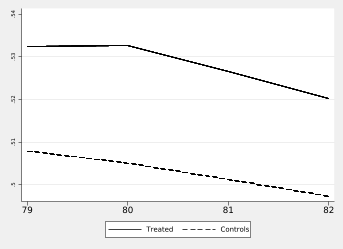

In [14]:
*** BEGIN SOLUTION
local tr_var treated_83
local vars ue stfrac hsd hsg smc clg gtc rs_wm
local v_max: word count `vars'
local cond year > 78 & year < 83
forvalues i= 1/`v_max' {
local v: word `i' of `vars'
local lab: var label `v'
egen mean_`v' = mean(`v'), by(`tr_var' year)
line mean_`v' year if `tr_var' == 1 & `cond', c(L) || line mean_`v' year if `tr_var' == 0 & `cond', c(L) legend(order(1 "Treated" 2 "Controls") size(small) ) scheme(sj) title("`lab'", size(small)) ylabel(, labsize(vsmall) ) xlabel(79(1)82) xscale(r(79 82)) xtitle("") ytitle("") saving(`v', replace)
}
*** END SOLUTION

In [15]:
*** BEGIN HIDDEN TESTS
local vars ue stfrac hsd hsg smc clg gtc rs_wm
local v_max: word count `vars'
forvalues i= 1/`v_max' {
loc file: word `i' of `vars'
local test`i' = fileexists("`file'.gph")
}
assert `test1' == 1 & `test2' == 1 & `test3' == 1 & `test4' == 1 & `test5' == 1 & `test6' == 1 & `test7' == 1 & `test8' == 1
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. local vars ue stfrac hsd hsg smc clg gtc rs_wm

. local v_max: word count `vars'

. forvalues i= 1/`v_max' {
  2. loc file: word `i' of `vars'
  3. local test`i' = fileexists("`file'.gph")
  4. }

. assert `test1' == 1 & `test2' == 1 & `test3' == 1 & `test4' == 1 & `test5' ==
>  1 & `test6' == 1 & `test7' == 1 & `test8' == 1

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


### Task 3 Covariate Balance



Task 3.1 Declare an empty matrix out with number of rows the same as the number of variables in task 2.2 and 4 columns: "Mean Controls", "Mean Treated", "Norm. Diff in means", "t-stat". The row labels should be the corresponding variable labels: "MORG unemployment" "State THS frac of total emp" "High school dropout" "High school graduate" "Some college" "College grad" "Greater than college" "White male".

In [16]:
*** BEGIN SOLUTION
local vars ue stfrac hsd hsg smc clg gtc rs_wm
local n_vars: word count `vars'
mat out = J(`n_vars',4,.)
matrix colnames out = "Mean Controls" "Mean Treated" "Norm Diff in means" "t-stat"
matrix rownames out = "MORG unemployment" "State THS frac of total emp" "High school dropout" "High school graduate" "Some college" "College grad" "Greater than college" "White male"
matlist out
*** END SOLUTION


. *** BEGIN SOLUTION
. local vars ue stfrac hsd hsg smc clg gtc rs_wm

. local n_vars: word count `vars'

. mat out = J(`n_vars',4,.)

. matrix colnames out = "Mean Controls" "Mean Treated" "Norm Diff in means" "t-
> stat"

. matrix rownames out = "MORG unemployment" "State THS frac of total emp" "High
>  school dropout" "High school graduate" "Some college" "College grad" "Greate
> r than college" "White male"

. matlist out

             | Mean Co~s  Mean Tr~d  Norm Di~s     t-stat 
-------------+--------------------------------------------
MORG unemp~t |         .          .          .          . 
State THS ~p |         .          .          .          . 
High schoo~t |         .          .          .          . 
High schoo~e |         .          .          .          . 
Some college |         .          .          .          . 
College grad |         .          .          .          . 
Greater th~e |         .          .          .          . 
  White male |         .          .  

In [17]:
*** BEGIN HIDDEN TESTS
loc test1 = rowsof(out)
loc test2 = colsof(out)
assert `test1' == 8 & `test2' == 4
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. loc test1 = rowsof(out)

. loc test2 = colsof(out)

. assert `test1' == 8 & `test2' == 4

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


Task 3.2 Keep only the pre-83 years and collapse the data to means of the variables in task 2.2 plus treated_83 for each state

In [18]:
*** BEGIN SOLUTION
save temp, replace
local vars ue stfrac hsd hsg smc clg gtc rs_wm
local cond year > 78 & year < 83
keep if `cond'
collapse `vars' treated_83, by(state)
*** END SOLUTION


. *** BEGIN SOLUTION
. save temp, replace
file temp.dta saved

. local vars ue stfrac hsd hsg smc clg gtc rs_wm

. local cond year > 78 & year < 83

. keep if `cond'
(1,000 observations deleted)

. collapse `vars' treated_83, by(state)

. *** END SOLUTION
. 


In [19]:
*** BEGIN HIDDEN TESTS
qui count
assert r(N) == 50
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. qui count

. assert r(N) == 50

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


Task 3.3 Populate the empty matrix out by looping over the variables in task 2.2, collecting the required statistics and computing the normalised difference between the means of the treated and control states and the associated t-statistic. 

In [20]:
*** BEGIN SOLUTION
local tr_var treated_83
local vars ue stfrac hsd hsg smc clg gtc rs_wm
local n_vars: word count `vars'
forvalues k = 1/`n_vars' {
loc v: word `k' of `vars'
qui sum `v' if `tr_var' == 0
local mean_c = r(mean)
local sd_c = r(sd)
local obs_c = r(N)

matrix out[`k',1] = r(mean)

qui sum `v' if `tr_var' == 1
local mean_t = r(mean)
local sd_t = r(sd)
local obs_t = r(N)

matrix out[`k',2] = r(mean)

local diff = abs(`mean_t'-`mean_c')/sqrt((`sd_t'^2 + `sd_c'^2)/2)
di "`k' diff `v'=`diff'"
local t_stat = abs(`mean_t'-`mean_c')/sqrt(`sd_t'^2/`obs_t' + `sd_c'^2/`obs_c')
di "t_stat=`t_stat'"
matrix out[`k',3] = `diff'
matrix out[`k',4] = `t_stat'
}
matlist out, twidth(25)
*** END SOLUTION


. *** BEGIN SOLUTION
. local tr_var treated_83

. local vars ue stfrac hsd hsg smc clg gtc rs_wm

. local n_vars: word count `vars'

. forvalues k = 1/`n_vars' {
  2. loc v: word `k' of `vars'
  3. qui sum `v' if `tr_var' == 0
  4. local mean_c = r(mean)
  5. local sd_c = r(sd)
  6. local obs_c = r(N)
  7. 
. matrix out[`k',1] = r(mean)
  8. 
. qui sum `v' if `tr_var' == 1
  9. local mean_t = r(mean)
 10. local sd_t = r(sd)
 11. local obs_t = r(N)
 12. 
. matrix out[`k',2] = r(mean)
 13. 
. local diff = abs(`mean_t'-`mean_c')/sqrt((`sd_t'^2 + `sd_c'^2)/2)
 14. di "`k' diff `v'=`diff'"
 15. local t_stat = abs(`mean_t'-`mean_c')/sqrt(`sd_t'^2/`obs_t' + `sd_c'^2/`ob
> s_c')
 16. di "t_stat=`t_stat'"
 17. matrix out[`k',3] = `diff'
 18. matrix out[`k',4] = `t_stat'
 19. }
1 diff ue=.2964520931270188
t_stat=.8119676939652702
2 diff stfrac=.166253846079611
t_stat=.4520992818007479
3 diff hsd=.4878023865586242
t_stat=1.336561350334532
4 diff hsg=.2226974275200188
t_stat=.6057352553781933
5 d

In [21]:
*** BEGIN HIDDEN TESTS
loc test1 = out[1,4]
loc test2 = out[8,4]
assert inrange(`test1',0.81,0.82) & inrange(`test2',1.25,1.26)
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. loc test1 = out[1,4]

. loc test2 = out[8,4]

. assert inrange(`test1',0.81,0.82) & inrange(`test2',1.25,1.26)

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


Task 4.1 Use the file temp that you saved in task 3.2, generate a variable named post equal to 1 in 83 and after and 0 otherwise.

In [22]:
*** BEGIN SOLUTION
use temp, clear
gen post = cond(year >= 83,1,0)
*** END SOLUTION


. *** BEGIN SOLUTION
. use temp, clear

. gen post = cond(year >= 83,1,0)

. *** END SOLUTION
. 


In [23]:
*** BEGIN HIDDEN TESTS
qui count if post == 1
assert r(N) == 750
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. qui count if post == 1

. assert r(N) == 750

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 


Task 4.3 Clear Stata’s memory of stored estimates. Run two regressions with the quietly eststo prefix: one of stfrac on post, treated_83 and their interaction and another including as controls the variables in task 2.2 (except stfrac and hsd – make sure you know why). Show the results of the two regressions in the results window next to each other with the esttab option drop(\*0.* ).

In [24]:
*** BEGIN SOLUTION
eststo clear
local vars ue hsg smc clg gtc rs_wm
qui eststo: reg stfrac i.post##i.treated_83
qui eststo: reg stfrac i.post##i.treated_83 `vars'
esttab , nodepvar nomtitles drop(*0.* )
*** END SOLUTION


. *** BEGIN SOLUTION
. eststo clear

. local vars ue hsg smc clg gtc rs_wm

. qui eststo: reg stfrac i.post##i.treated_83

. qui eststo: reg stfrac i.post##i.treated_83 `vars'

. esttab , nodepvar nomtitles drop(*0.* )

--------------------------------------------
                      (1)             (2)   
--------------------------------------------
1.post            0.00765***      0.00411***
                  (12.77)          (5.40)   

1.treated_83     0.000417        -0.00116   
                   (0.43)         (-1.03)   

1.post#1.~83    -0.000847       -0.000160   
                  (-0.72)         (-0.13)   

ue                                -0.0700***
                                  (-5.53)   

hsg                               -0.0138   
                                  (-1.71)   

smc                                0.0334***
                                   (4.64)   

clg                               -0.0674***
                                  (-5.10)   

gtc    

In [25]:
*** BEGIN HIDDEN TESTS
qui count if e(sample)
assert r(N) == 684
python: Macro.getGlobal('c(rc)')=='0'
*** END HIDDEN TESTS


. *** BEGIN HIDDEN TESTS
. qui count if e(sample)

. assert r(N) == 684

. python: Macro.getGlobal('c(rc)')=='0'

. *** END HIDDEN TESTS
. 
